# Training

In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
%load_ext autoreload

import os, re, json, time, copy, csv, glob, itertools, pickle, warnings, shutil, torch, torchvision, pandas as pd
import numpy as np, matplotlib.pyplot as plt, seaborn as sns, matplotlib.image as mpimg

from IPython.display import Image
from numpy import genfromtxt
from pandas.tools.plotting import table
pd.options.display.max_columns = 100
warnings.simplefilter(action='ignore', category=FutureWarning)
import helper

## Set-up

In [2]:
gpu, sample = True, False
data_dir = os.path.join(helper.get_home(), 'N', 'Plants', 'dataset')
save_dir = os.path.join(helper.get_home(), 'N', 'Plants', 'checkpoint')
log_dir = os.path.join('.', 'log')

In [3]:
cat_to_name_json = os.path.join(data_dir, 'cat_to_name.json')
with open(cat_to_name_json, 'r') as f:
    cat_to_name = json.load(f)
cat_to_name

{'1': 'Acalypha hispida [EUPHORBIACAE]',
 '2': 'Bauhinia coccinea [FABACEAE]',
 '3': 'Calotropis gigantea [APOCYNACEAE]',
 '4': 'Clitoria ternatea [FABACEAE]',
 '5': 'Dillenia suffruticosa [DILLENIACEAE]',
 '6': 'Ficus deltoidea [MORACEAE]',
 '7': 'Melastoma beccarianum [MELASTOMATACEAE]',
 '8': 'Melastoma malabathricum [MELASTOMATACEAE]',
 '9': 'Melastoma malabathricum var alba [MELASTOMATACEAE]',
 '10': 'Passiflora foetida [PASSIFLORACEAE]',
 '11': 'Petrea volubilis [VERBENACEAE]'}

In [4]:
if not os.path.exists(save_dir):
    os.makedirs(save_dir)
if not os.path.exists(log_dir):
    os.makedirs(log_dir)

## Hyperparameters for Training and Predict

In [5]:
batch = 32
arch = 'alexnet' 
hidden_units, epochs, dropout, learning_rate = 4096, 200, 0.5, 0.01

optim_name, momentum = 'SGD', 0.9 
#optim_name = 'Adam'

cpt_name = arch + "-" +str(hidden_units) + "-" + str(batch) + "-" + str(epochs) + "-" + str(dropout) + "-" + str(learning_rate) + '-' + optim_name + '-' + str(sample)

cpt = os.path.join(save_dir, cpt_name + '-cpt.pt')
log = os.path.join(log_dir, cpt_name + '-log.csv')

## Data Loader

In [6]:
image_datasets, dataloaders, dataset_sizes, num_labels = helper.get_data(data_dir, batch)
print('Total Labels are {}'.format(num_labels))
print('Dataset is {}'.format(dataset_sizes))

Total Labels are 11
Dataset is {'train': 596, 'test': 144}


## Experiment 1

In [7]:
# Reset hyperparametrs if required

In [8]:
model = helper.get_model_1(arch, hidden_units, num_labels, dropout) # supports archs = ['alexnet', 'vgg16', 'vgg19']
print(model)

trained_model, train_loss, train_acc, train_time, test_loss, test_acc, test_time = helper.train(arch, model, gpu, sample, image_datasets, dataloaders, dataset_sizes, save_dir, hidden_units, epochs, dropout, learning_rate, num_labels, cpt, optim_name)

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (fc1): Linear(in_features=9216, out_features=4096, bias=True)
    (relu1): ReLU(inplace)
    (dropout1): Dropout(p=0.5)
    (fc2): Linear(in_features=4096, out_features=4096, b

  Epoch 44 Phase train Loss 0.032 Acc 0.6694630872483222 Time 166.9055690765381
  Epoch 44 Phase test Loss 0.022 Acc 0.7847222222222222 Time 207.9647388458252
  Epoch 45 Phase train Loss 0.033 Acc 0.6442953020134228 Time 166.87051963806152
  Epoch 45 Phase test Loss 0.022 Acc 0.8194444444444444 Time 208.1322729587555
  Epoch 46 Phase train Loss 0.031 Acc 0.6593959731543624 Time 168.43297219276428
  Epoch 46 Phase test Loss 0.023 Acc 0.75 Time 209.7329273223877
  Epoch 47 Phase train Loss 0.029 Acc 0.7231543624161074 Time 168.2294840812683
  Epoch 47 Phase test Loss 0.020 Acc 0.7916666666666666 Time 209.59637784957886
  Epoch 48 Phase train Loss 0.031 Acc 0.6912751677852349 Time 167.67519235610962
  Epoch 48 Phase test Loss 0.021 Acc 0.8055555555555555 Time 208.70633625984192
  Epoch 49 Phase train Loss 0.028 Acc 0.7080536912751678 Time 167.5686810016632
  Epoch 49 Phase test Loss 0.021 Acc 0.8125 Time 208.85420989990234
  Epoch 50 Phase train Loss 0.029 Acc 0.7080536912751678 Time 167.

  Epoch 96 Phase train Loss 0.022 Acc 0.7651006711409396 Time 167.83329343795776
  Epoch 96 Phase test Loss 0.019 Acc 0.7916666666666666 Time 208.9821901321411
  Epoch 97 Phase train Loss 0.022 Acc 0.7701342281879194 Time 167.54685759544373
  Epoch 97 Phase test Loss 0.019 Acc 0.8263888888888888 Time 208.61394691467285
  Epoch 98 Phase train Loss 0.021 Acc 0.8003355704697986 Time 167.56325244903564
  Epoch 98 Phase test Loss 0.019 Acc 0.8194444444444444 Time 208.73492646217346
  Epoch 99 Phase train Loss 0.023 Acc 0.7818791946308725 Time 167.8375027179718
  Epoch 99 Phase test Loss 0.013 Acc 0.8472222222222222 Time 208.9977343082428
  Epoch 100 Phase train Loss 0.017 Acc 0.8171140939597316 Time 167.84409928321838
  Epoch 100 Phase test Loss 0.014 Acc 0.861111111111111 Time 208.9732575416565
  Epoch 101 Phase train Loss 0.020 Acc 0.8003355704697986 Time 167.8009912967682
  Epoch 101 Phase test Loss 0.020 Acc 0.8472222222222222 Time 208.92971634864807
  Epoch 102 Phase train Loss 0.019 A

  Epoch 147 Phase train Loss 0.017 Acc 0.8271812080536912 Time 167.27716088294983
  Epoch 147 Phase test Loss 0.012 Acc 0.875 Time 208.27250289916992
  Epoch 148 Phase train Loss 0.016 Acc 0.8204697986577181 Time 167.1512050628662
  Epoch 148 Phase test Loss 0.015 Acc 0.861111111111111 Time 208.13065910339355
  Epoch 149 Phase train Loss 0.014 Acc 0.8506711409395973 Time 167.30918860435486
  Epoch 149 Phase test Loss 0.015 Acc 0.8472222222222222 Time 208.44517397880554
  Epoch 150 Phase train Loss 0.017 Acc 0.8355704697986577 Time 167.30206561088562
  Epoch 150 Phase test Loss 0.014 Acc 0.8680555555555555 Time 208.35517287254333
  Epoch 151 Phase train Loss 0.016 Acc 0.8590604026845637 Time 167.1652500629425
  Epoch 151 Phase test Loss 0.014 Acc 0.875 Time 208.16267657279968
  Epoch 152 Phase train Loss 0.016 Acc 0.8523489932885906 Time 167.33179545402527
  Epoch 152 Phase test Loss 0.015 Acc 0.8958333333333333 Time 208.39637517929077
  Epoch 153 Phase train Loss 0.020 Acc 0.8036912751

  Epoch 198 Phase test Loss 0.014 Acc 0.875 Time 209.63844919204712
  Epoch 199 Phase train Loss 0.015 Acc 0.8590604026845637 Time 166.95439839363098
  Epoch 199 Phase test Loss 0.010 Acc 0.8819444444444444 Time 208.02330660820007
  Epoch 200 Phase train Loss 0.015 Acc 0.8573825503355704 Time 167.17430233955383
  Epoch 200 Phase test Loss 0.014 Acc 0.8472222222222222 Time 208.2540032863617

Best Accuracy 0.917


       train_acc  test_acc  train_loss  test_loss  train_time  test_time
epoch                                                                   
1          0.116     0.146       0.076      0.081     166.284    206.916
2          0.141     0.090       0.076      0.083     163.905    204.425
3          0.112     0.090       0.077      0.081     164.797    205.392
4          0.149     0.201       0.075      0.079     164.920    205.468
5          0.173     0.285       0.075      0.075     164.715    204.720
6          0.205     0.410       0.071      0.065     167.400    208.227
7          0.232     0.410       0.067      0.061     170.155    211.447
8          0.337     0.507       0.061      0.052     167.505    208.501
9          0.344     0.486       0.059      0.050     167.542    208.419
10         0.404     0.500       0.054      0.044     166.038    206.768
11         0.451     0.556       0.053      0.046     167.917    208.732
12         0.446     0.597       0.051      0.040  

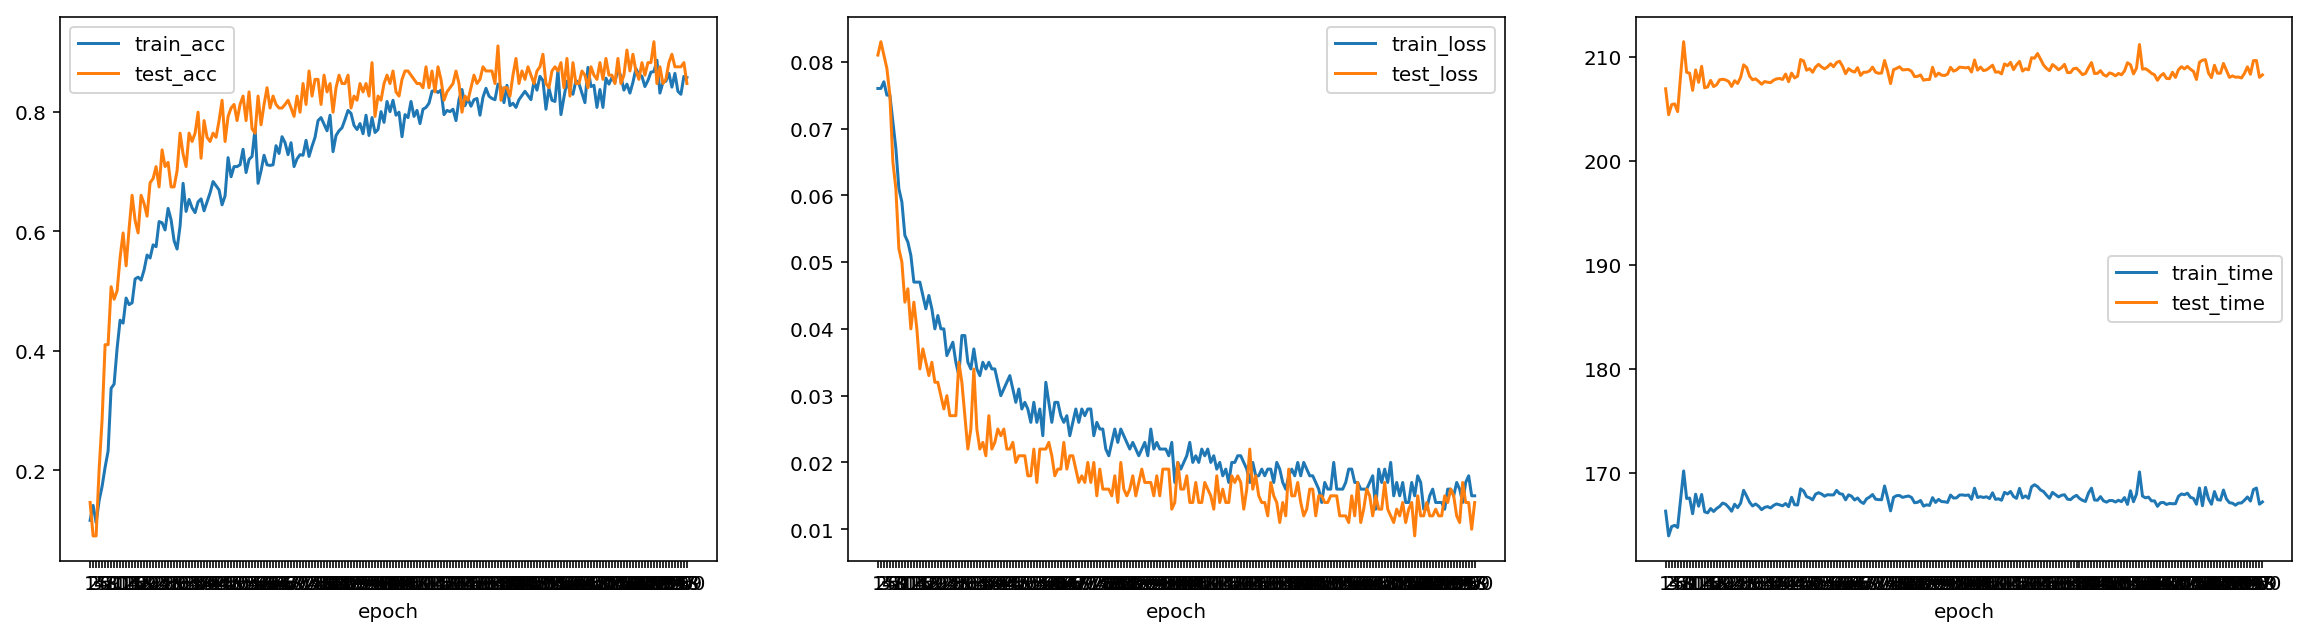

In [9]:
epoch = [int(idx+1) for idx in range(len(train_acc))]
stack = (epoch, train_acc, test_acc, train_loss, test_loss, train_time, test_time)
header = 'epoch,' + 'train_acc,' + 'test_acc,' + 'train_loss,' + 'test_loss,' + 'train_time,' + 'test_time'
helper.save_and_plot(stack, header, log)

## Predict

['Acalypha hispida [EUPHORBIACAE]', 'Melastoma malabathricum var alba [MELASTOMATACEAE]', 'Passiflora foetida [PASSIFLORACEAE]']


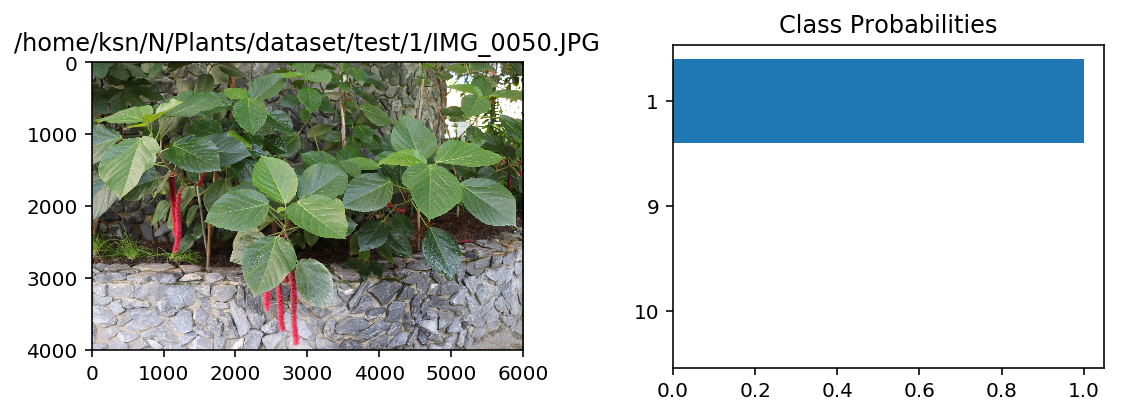

In [11]:
image_path = os.path.join(data_dir, 'test', '1', 'IMG_0050.JPG')
probs, classes = helper.predict(image_path, cpt, top_k=3, gpu=True)
cats = [cat_to_name[c] for c in classes]
#print(probs, classes)
helper.display_classes(image_path, probs, classes, cats)
print(cats)